In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
warnings.filterwarnings(action="ignore",
                        message="^internal gelsd")
sns.set(font_scale=1.5)
sns.set_style('darkgrid',
              {'xtick.bottom' : True,
               'ytick.left': True,
               'grid.linestyle':'--',
               'font.monospace': ['Computer Modern Typewriter'],
               'axes.edgecolor' : 'white'})
pd.set_option("display.max_rows",
              None, 
              "display.max_columns",
              None)

%matplotlib inline
%config InlineBackend.figure_format ='retina'

In [3]:
def axes_log_conversion (list_of_values):
    list_num = []
    for i in list_of_values:
        list_num.append(str(int(round(((-10**(-i) + 1) * 100),0))) + '%')
    return list_num

In [4]:
df = pd.read_csv('../data/machine-translation-on-wmt2014-en-de.csv',
                 usecols=['name',
                          'year',
                          'hardware_burden',
                          '(BLEU)'])[3:].reset_index(drop=True)

In [5]:
df = df.astype({'hardware_burden': 'float64',
                '(BLEU)': 'float64'})

df['bleu_percent'] = df['(BLEU)'].astype(float)/100

df = df[['name', 
         'year',
         'bleu_percent',
         'hardware_burden']]

In [6]:
df.head(10)

,name,year,bleu_percent,hardware_burden
0,Transformer Cycle (Rev),2021,0.3514,NaN
1,Noisy back-translation,2018,0.3500,1.460000e+20
2,Transformer+Rep (Uni),2021,0.3389,NaN
3,T5-11B,2019,0.3210,NaN
4,BiBERT,2021,0.3126,1.020000e+21
5,Transformer + R-Drop,2021,0.3091,NaN
6,BERT-fused NMT,2020,0.3075,1.140000e+20
7,Data Diversification - Transformer,2019,0.3070,NaN
8,Mask Attention Network (big),2021,0.3040,NaN
9,Transformer (ADMIN init),2020,0.3010,NaN


## Hardware Burden

In [7]:
acc__hw_burden__poly = ols('I((np.log10(1/(1-bleu_percent)))) ~ I(np.log10(hardware_burden))',data=df).fit()
print(acc__hw_burden__poly.summary()) 

                                      OLS Regression Results                                     
Dep. Variable:     I((np.log10(1 / (1 - bleu_percent))))   R-squared:                       0.188
Model:                                               OLS   Adj. R-squared:                  0.107
Method:                                    Least Squares   F-statistic:                     2.321
Date:                                   Thu, 04 Aug 2022   Prob (F-statistic):              0.159
Time:                                           09:19:16   Log-Likelihood:                 30.130
No. Observations:                                     12   AIC:                            -56.26
Df Residuals:                                         10   BIC:                            -55.29
Df Model:                                              1                                         
Covariance Type:                               nonrobust                                         
                    

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


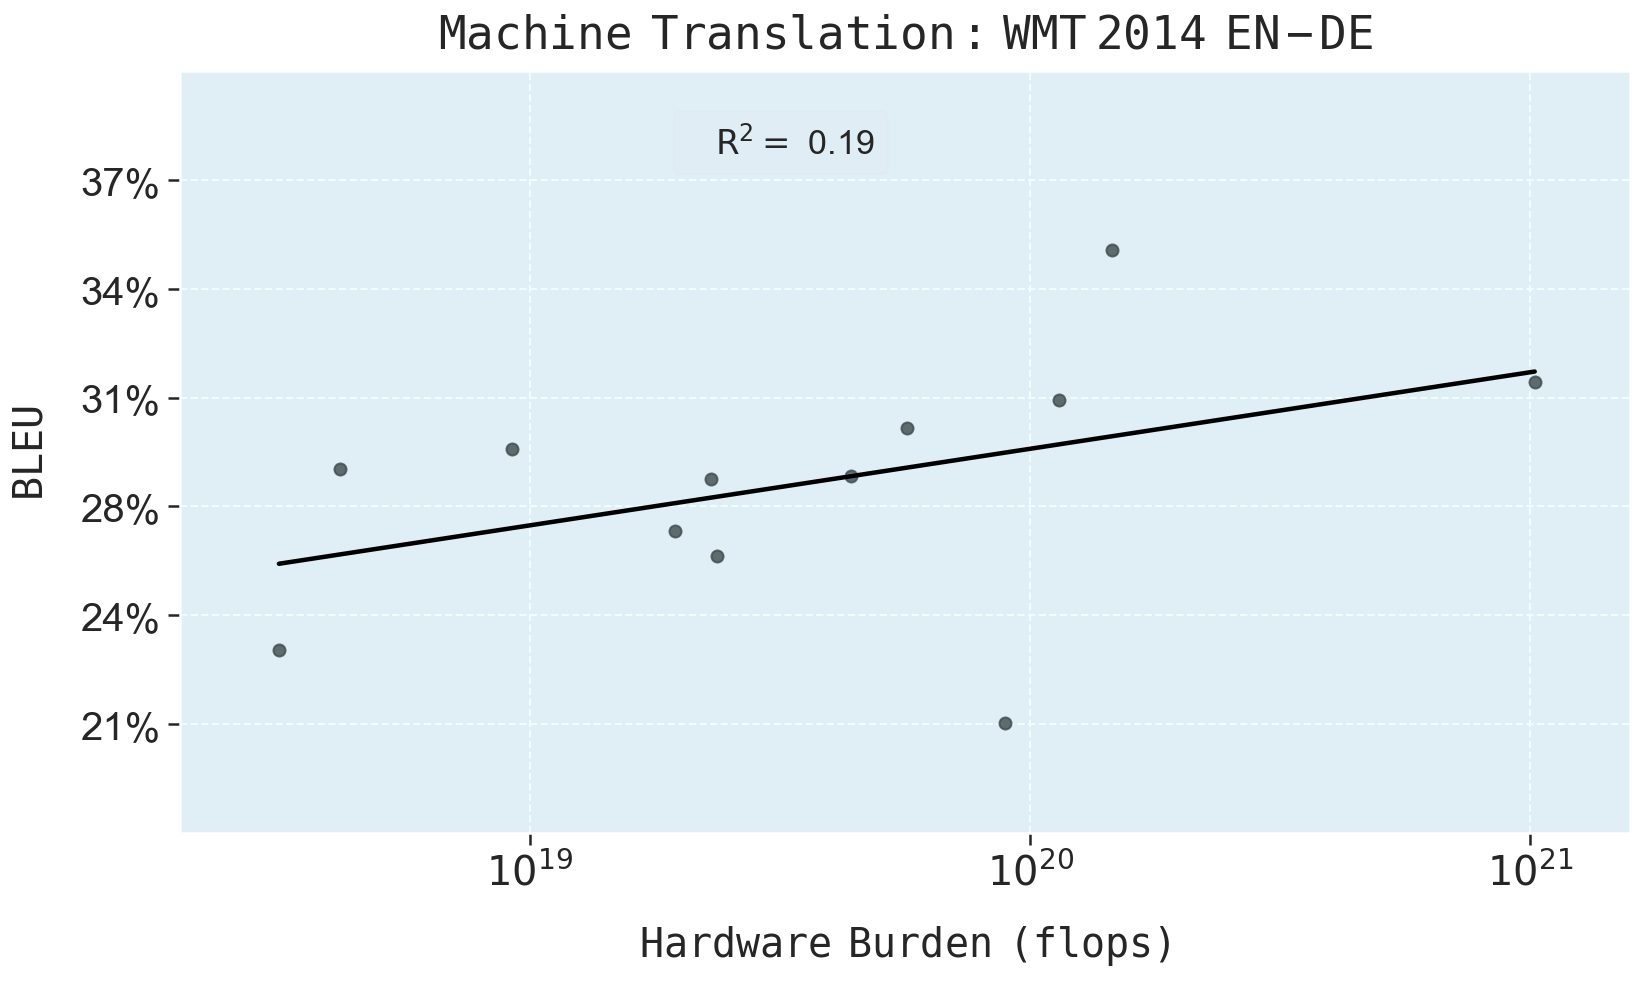

In [14]:
fig = plt.figure(figsize=(20, 10))

sns.regplot(x=np.log10(df['hardware_burden']),
            y=np.log10(1/(1-df['bleu_percent'])),
            color='black',
            ci = False,
            label=r'$\mathrm{R^{2}}=\ $' +
            str(round(acc__hw_burden__poly.rsquared,2)))

plt.title('$\mathtt{Machine\ \ Translation:\ WMT\ 2014\ \ EN-DE}$',
          fontsize=25,
          weight='bold',
          pad=12)

plt.ylabel("$\mathtt{BLEU}$",
           fontsize=25,
           labelpad=15,
           weight='bold')

plt.xlabel("$\mathtt{Hardware\ \ Burden\ \ (flops)}$",
           fontsize=25,
           labelpad=15,
           rotation=0,
           y=.975,
           weight='bold')

plt.legend(bbox_to_anchor=(.5,.97),
           handlelength=0,
           framealpha =.03,
           fontsize=17,
           markerscale=0)

plt.axhspan(0.08, .22,
            color="#c9f9ff",
            alpha=0.3)

x = np.arange(19,22,1)

y = np.arange(.1,.22,.02)

x_label = ['$10^{19}$',
           '$10^{20}$',
           '$10^{21}$']

y_label = axes_log_conversion(y)

plt.xlim(18.3, 21.2)

plt.ylim(0.08, .22)

plt.xticks(x, x_label, size=23)

plt.yticks(y, y_label, size=23)

plt.show()

In [9]:
acc__hw_burden__exp = ols('I((1/(1-bleu_percent))) ~ I(np.log10(hardware_burden))',data=df).fit()
print(acc__hw_burden__exp.summary()) 

                                 OLS Regression Results                                
Dep. Variable:     I((1 / (1 - bleu_percent)))   R-squared:                       0.198
Model:                                     OLS   Adj. R-squared:                  0.118
Method:                          Least Squares   F-statistic:                     2.475
Date:                         Thu, 04 Aug 2022   Prob (F-statistic):              0.147
Time:                                 09:19:17   Log-Likelihood:                 16.256
No. Observations:                           12   AIC:                            -28.51
Df Residuals:                               10   BIC:                            -27.54
Df Model:                                    1                                         
Covariance Type:                     nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

/opt/homebrew/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
